<a href="https://colab.research.google.com/github/Marteldelfer/PISI3/blob/main/Analise_exploratoria_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMDB

Neste trabalhos usaremos uma base de dados do TMDB para resolver problemas usando Inteligência Artificial. O TMDB é uma base de dados online muito completa que trata sobre filmes.

Esta análise toma como base a metodologia KDD que é um processo de várias etapas, flexível e interativo, para descobrir padrões novos, válidos, úteis e fáceis de entender em um conjunto de dados.

Esta metodologia consiste em cinco etapas: Seleção,Pré-Processamento,Transformação, Mineiração dos dados, Interpretação. O desenvolvimento de cada etapa fica disposto a seguir


## Seleção

A fase de seleção no KDD (Knowledge Discovery in Databases — Descoberta de Conhecimento em Bases de Dados) é a parte em que os atributos para a análise são escolhidos.

Mas antes disso, se faz necessário a importação do dataset e listagem dos atributos.

In [4]:
''' Importando dependências '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
tmdb_df = pd.read_csv("TMDB_all_movies.csv")


In [8]:
tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090315 entries, 0 to 1090314
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1090315 non-null  int64  
 1   title                    1090302 non-null  object 
 2   vote_average             1090313 non-null  float64
 3   vote_count               1090313 non-null  float64
 4   status                   1090313 non-null  object 
 5   release_date             965338 non-null   object 
 6   revenue                  1090313 non-null  float64
 7   runtime                  1090313 non-null  float64
 8   budget                   1090313 non-null  float64
 9   imdb_id                  616716 non-null   object 
 10  original_language        1090313 non-null  object 
 11  original_title           1090303 non-null  object 
 12  overview                 894147 non-null   object 
 13  popularity               1090313 non-null 

Em seguida, os atributos status, overview,poster_path, spoken_languages e tagline não farão parte da análise e portanto serão retirados.


In [9]:
tmdb_df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,1.090315e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,1.090313e+06,446114.000000,4.461140e+05
mean,7.677656e+05,2.059923e+00,2.269640e+01,7.847183e+05,4.478029e+01,3.060094e+05,1.202150e+00,6.247975,2.808404e+03
std,4.239017e+05,3.078309e+00,3.608879e+02,1.912606e+07,5.801035e+01,5.239084e+06,2.970237e+00,1.322068,3.184735e+04
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,5.000000e+00
25%,4.075925e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e-01,5.500000,2.000000e+01
50%,7.646600e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,0.000000e+00,6.030000e-01,6.300000,5.900000e+01
75%,1.151392e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00,1.256000e+00,7.100000,2.660000e+02
max,5.180730e+06,1.000000e+01,3.741700e+04,5.000000e+09,1.440000e+04,1.000000e+09,5.674906e+02,10.000000,3.038716e+06


In [21]:
tmdb = tmdb.drop(columns=['status', 'imdb_id', 'original_title', 'overview', 'tagline', 'spoken_languages', 'poster_path'])
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20016 entries, 2 to 1088184
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       20016 non-null  int64  
 1   title                    20016 non-null  object 
 2   vote_average             20016 non-null  float64
 3   vote_count               20016 non-null  float64
 4   release_date             20016 non-null  object 
 5   revenue                  20016 non-null  float64
 6   runtime                  20016 non-null  float64
 7   budget                   20016 non-null  float64
 8   original_language        20016 non-null  object 
 9   popularity               20016 non-null  float64
 10  genres                   20016 non-null  object 
 11  production_companies     19070 non-null  object 
 12  production_countries     19545 non-null  object 
 13  cast                     19867 non-null  object 
 14  director                 

In [11]:
tmdb = tmdb_df[tmdb_df['status'] == 'Released']
tmdb = tmdb_df[tmdb_df['budget'] != 0]
tmdb = tmdb_df[tmdb_df['revenue'] != 0]
tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
2,5,Four Rooms,5.862,2688.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"David Proval, Salma Hayek Pinault, Paul Calder...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Phil Parmet, Andrzej Sekula, Guillermo Navarro...","Allison Anders, Alexandre Rockwell, Quentin Ta...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,114105.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.500,349.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Doug Wert, Hank McGill, Christine Harnos, Raic...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Gene Levy, Marilyn Vance, Lloyd Segan",Alan Silvestri,6.6,19891.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
6,11,Star Wars,8.204,21112.0,Released,1977-05-25,775398007.0,121.0,11000000.0,tt0076759,...,English,"Ted Burnett, Jerry Walter, James Earl Jones, T...",George Lucas,Gilbert Taylor,George Lucas,"Rick McCallum, George Lucas, Gary Kurtz",John Williams,8.6,1505380.0,/6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg
7,12,Finding Nemo,7.800,19622.0,Released,2003-05-30,940335536.0,100.0,94000000.0,tt0266543,...,English,"Ellen DeGeneres, Geoffrey Rush, Eric Bana, Geo...",Andrew Stanton,"Jeremy Lasky, Sharon Calahan","Adam Bronstein, Bob Peterson, Jim Capobianco, ...","Graham Walters, John Lasseter",Thomas Newman,8.2,1158587.0,/eHuGQ10FUzK1mdOY69wF5pGgEf5.jpg
8,13,Forrest Gump,8.468,28113.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,...,English,"Margo Moorer, Joe Stefanelli, Ed Davis, Elizab...",Robert Zemeckis,Don Burgess,"Winston Groom, Eric Roth","Wendy Finerman, Steve Tisch, Steve Starkey",Alan Silvestri,8.8,2375129.0,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg


Retirando registros com campos nulos

In [22]:
tmdb_df = tmdb.dropna(subset=['title', 'genres', 'imdb_rating', 'imdb_votes', 'release_date'])
tmdb_df.tail()

tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20016 entries, 2 to 1088184
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       20016 non-null  int64  
 1   title                    20016 non-null  object 
 2   vote_average             20016 non-null  float64
 3   vote_count               20016 non-null  float64
 4   release_date             20016 non-null  object 
 5   revenue                  20016 non-null  float64
 6   runtime                  20016 non-null  float64
 7   budget                   20016 non-null  float64
 8   original_language        20016 non-null  object 
 9   popularity               20016 non-null  float64
 10  genres                   20016 non-null  object 
 11  production_companies     19070 non-null  object 
 12  production_countries     19545 non-null  object 
 13  cast                     19867 non-null  object 
 14  director                 

Resetando id

In [23]:
tmdb_df.reset_index(drop=True, inplace=True)
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20016 entries, 0 to 20015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       20016 non-null  int64  
 1   title                    20016 non-null  object 
 2   vote_average             20016 non-null  float64
 3   vote_count               20016 non-null  float64
 4   release_date             20016 non-null  object 
 5   revenue                  20016 non-null  float64
 6   runtime                  20016 non-null  float64
 7   budget                   20016 non-null  float64
 8   original_language        20016 non-null  object 
 9   popularity               20016 non-null  float64
 10  genres                   20016 non-null  object 
 11  production_companies     19070 non-null  object 
 12  production_countries     19545 non-null  object 
 13  cast                     19867 non-null  object 
 14  director              


## Pré-processamento


Em seguida os filmes que ainda não foram lançados,ou seja, os filmes rumorados, em produção ou cancelados  são retirados. Pois não devem ser considerados nesta análise.Além disso, serão tirados filmes como o orçamento e arrecadação iguais a 0.




In [29]:
# Retirando os valores que tem budget = 0 ou revenue = 0

tmdb_df = tmdb_df[tmdb_df['budget'] != 0]
tmdb_df = tmdb_df[tmdb_df['revenue'] != 0]
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12032 entries, 0 to 20015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   release_date             12032 non-null  object 
 5   revenue                  12032 non-null  float64
 6   runtime                  12032 non-null  float64
 7   budget                   12032 non-null  float64
 8   original_language        12032 non-null  object 
 9   popularity               12032 non-null  float64
 10  genres                   12032 non-null  object 
 11  production_companies     11629 non-null  object 
 12  production_countries     11781 non-null  object 
 13  cast                     11983 non-null  object 
 14  director                 11

In [31]:
tmdb_df = tmdb_df[tmdb_df['budget'] != 0]
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12032 entries, 0 to 20015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   release_date             12032 non-null  object 
 5   revenue                  12032 non-null  float64
 6   runtime                  12032 non-null  float64
 7   budget                   12032 non-null  float64
 8   original_language        12032 non-null  object 
 9   popularity               12032 non-null  float64
 10  genres                   12032 non-null  object 
 11  production_companies     11629 non-null  object 
 12  production_countries     11781 non-null  object 
 13  cast                     11983 non-null  object 
 14  director                 11

Além disso, foi criado o campo 'profit_percentage' que diz qual a razão entre o orçamento e arrecadação


In [32]:
tmdb_df['profit_percentage'] = (((tmdb_df['revenue'] - tmdb_df['budget']) / tmdb_df['budget']) * 100)

tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12032 entries, 0 to 20015
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12032 non-null  int64  
 1   title                    12032 non-null  object 
 2   vote_average             12032 non-null  float64
 3   vote_count               12032 non-null  float64
 4   release_date             12032 non-null  object 
 5   revenue                  12032 non-null  float64
 6   runtime                  12032 non-null  float64
 7   budget                   12032 non-null  float64
 8   original_language        12032 non-null  object 
 9   popularity               12032 non-null  float64
 10  genres                   12032 non-null  object 
 11  production_companies     11629 non-null  object 
 12  production_countries     11781 non-null  object 
 13  cast                     11983 non-null  object 
 14  director                 11

## Carregue o arquivo tratado aqui


In [ ]:
# prompt: Exporte o tmdb_clean_df para csv e salve com o nome tmdb_clean.csv

tmdb_clean_df.to_csv('tmdb_clean.csv', index=False)
tmdb_df = pd.read_csv('tmdb_clean.csv')

tmdb_clean_df.info()


NameError: name 'tmdb_clean_df' is not defined

In [ ]:
'''Lendo csv e listando atributos'''

tmdb_df = pd.read_csv('tmdb_clean.csv')
tmdb_df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,1.203200e+04,12032.000000,12032.000000,1.203200e+04,12032.000000,1.203200e+04,12032.000000,12032.000000,1.203200e+04
mean,2.130602e+05,6.182667,1487.826878,6.044362e+07,106.897606,2.202409e+07,6.089499,6.341838,7.908939e+04
std,3.073344e+05,1.503858,3048.613088,1.502937e+08,29.061544,3.698798e+07,11.936525,1.143847,1.749742e+05
min,5.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.001000,1.000000,5.000000e+00
25%,1.144275e+04,5.781250,60.000000,1.563881e+06,93.000000,2.000000e+06,1.613625,5.700000,3.544500e+03
50%,4.412200e+04,6.400000,359.000000,1.073970e+07,104.000000,8.500000e+06,3.547500,6.400000,1.940200e+04
75%,3.393985e+05,7.000000,1462.000000,4.917633e+07,120.000000,2.500000e+07,7.521625,7.100000,7.636075e+04
max,1.472280e+06,10.000000,37417.000000,2.923706e+09,990.000000,5.400000e+08,558.689200,10.000000,3.038716e+06


Distribuição de filmes que arrecadaram mais de U$ 10.000.000,00 ao redor da história. Nota-se que durante a pandemia do coronavírus a frequência de lançamento deste tipo de filme diminui vertiginosamente por causa da quarentena.É evidente também que atualmente existe a tendência de queda na receita dos filmes, possivelmente por causa do streaming.



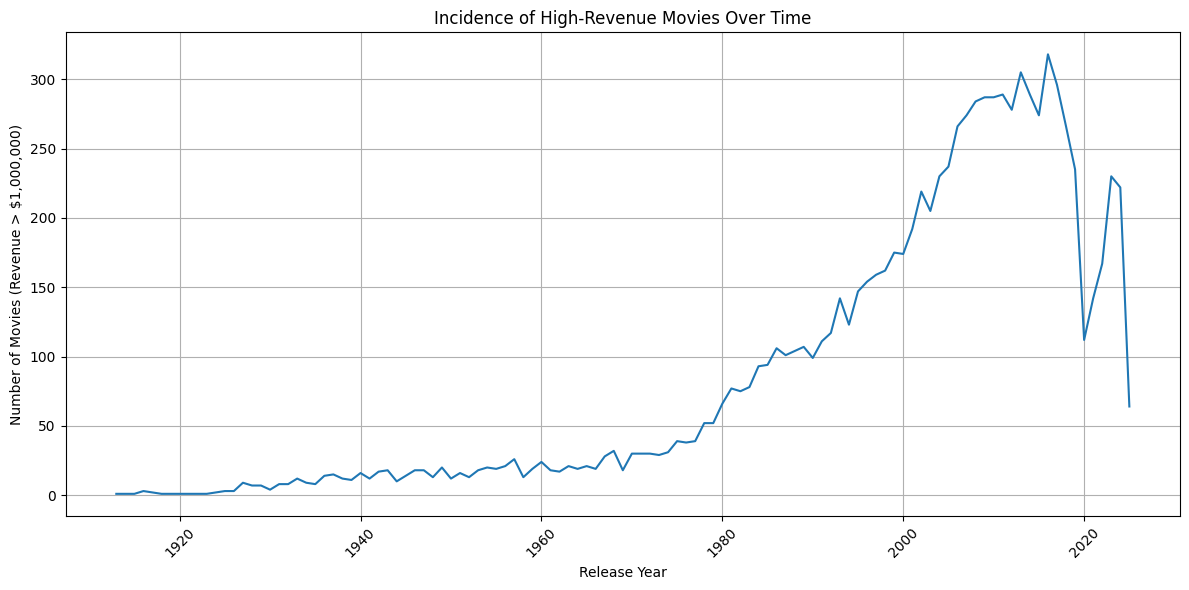

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

high_revenue_movies = tmdb_df[tmdb_df['revenue'] > 10000000]

movies_by_year = high_revenue_movies.groupby(high_revenue_movies['release_date'].dt.year)['revenue'].count()

plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies (Revenue > $10,000,000)')
plt.title('Incidence of High-Revenue Movies Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Relação de filmes por data do ano.

Nesta análise, é possível notar que os filmes que são lançados na segunda metade do ano tendem a ter mais sucesso. Segundo esta análise o período mais rentável é o de dezembro.


<ipython-input-11-ab1ef905ddbc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_month'] = filtered_df['release_date'].dt.month


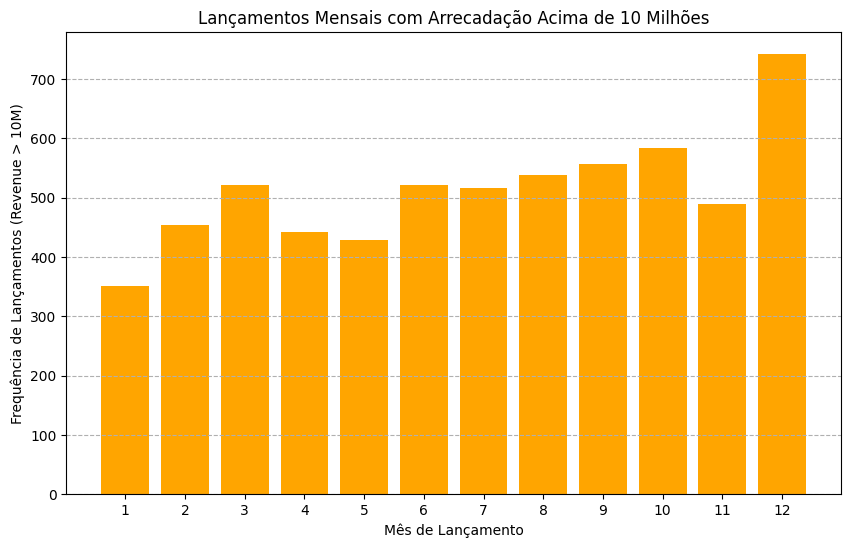

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

filtered_df = tmdb_df[tmdb_df['revenue'] > 10_000_000]

filtered_df['release_month'] = filtered_df['release_date'].dt.month

monthly_releases = filtered_df.groupby('release_month')['title'].count()

plt.figure(figsize=(10, 6))
plt.bar(monthly_releases.index, monthly_releases.values, color='orange')
plt.xlabel('Mês de Lançamento')
plt.ylabel('Frequência de Lançamentos (Revenue > 10M)')
plt.title('Lançamentos Mensais com Arrecadação Acima de 10 Milhões')
plt.xticks(monthly_releases.index)
plt.grid(axis='y', linestyle='--')
plt.show()


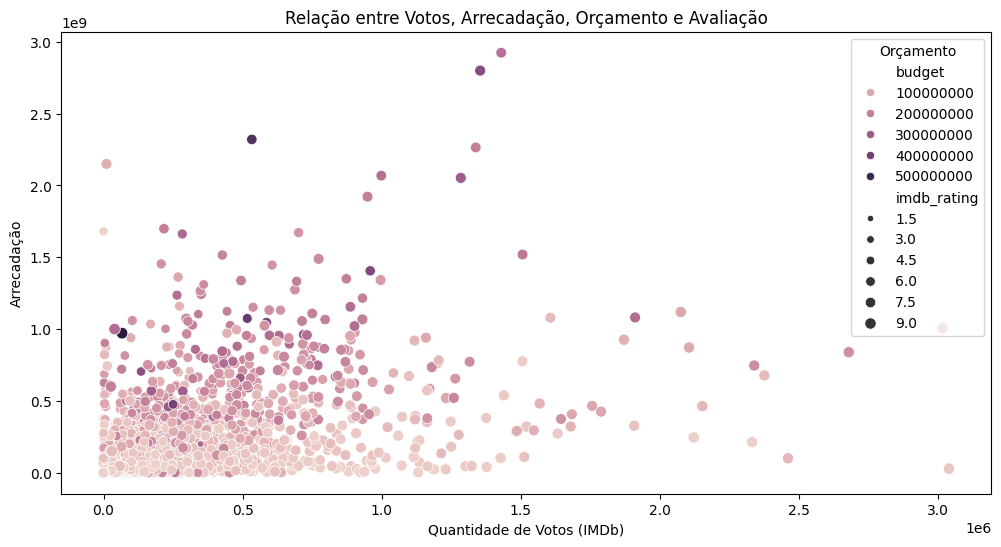

In [ ]:
# prompt: Faça um gráfico da relação entre quantidade de votos, média de avaliações  , orçamento e arrecadação

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tmdb_df' is your DataFrame loaded from 'tmdb_clean.csv'
# ... (your existing code to load and preprocess the data) ...

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=tmdb_df, x='imdb_votes', y='revenue', hue='budget', size='imdb_rating')
plt.xlabel('Quantidade de Votos (IMDb)')
plt.ylabel('Arrecadação')
plt.title('Relação entre Votos, Arrecadação, Orçamento e Avaliação')
plt.legend(title='Orçamento')
plt.show()
